By Priyal Jain

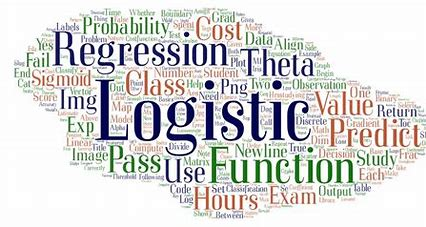

# Logistic Regression

* Logistic Regression is one of the most popular machine learning Algorithm, Which comes under the supervised Machine Learning

* It is used to predict the categorical dependent variable 
* its work on Binary Classification problem like 0,1


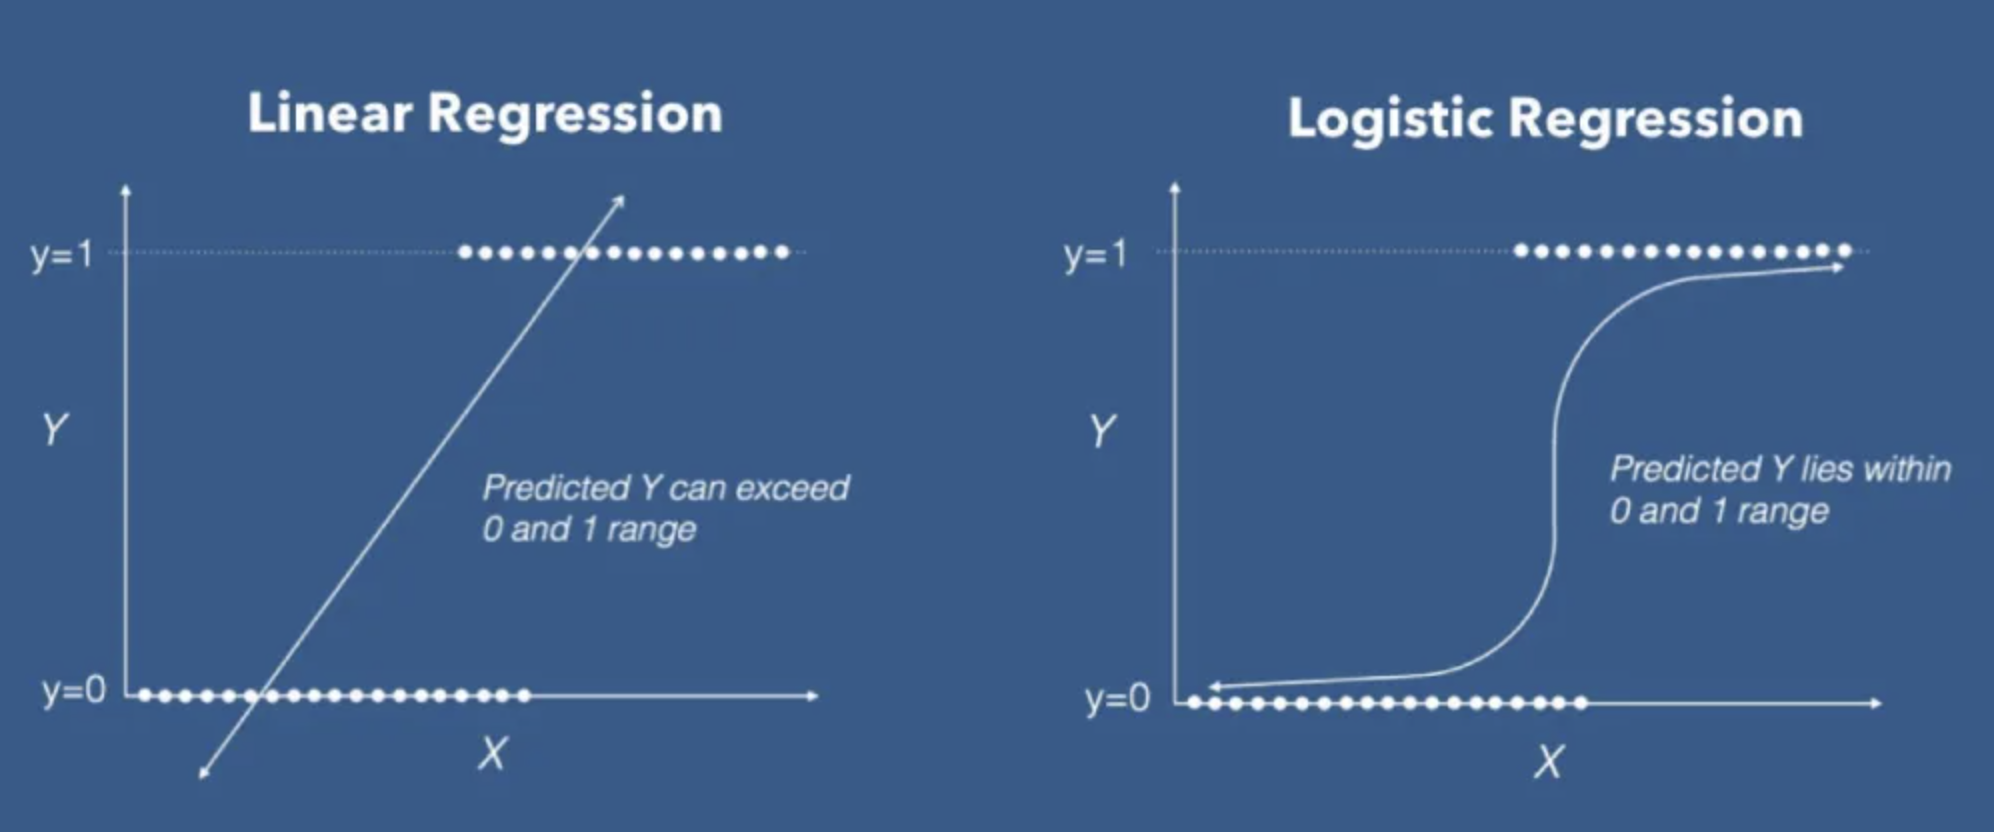

## Assumption for Logistic Regression 

1. The dependent variable must be categorical in nature.
2. Independent variable should not multi-collinearity
3. the Dependent variable should be two category than it will perform well
  Because its work on Binary classification 

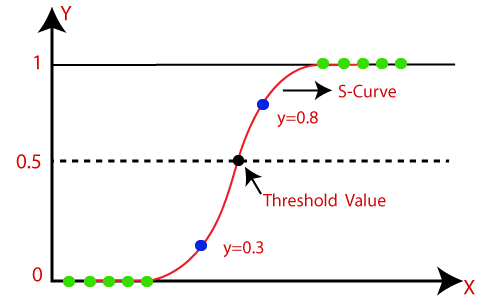

### What is Sigmoid Function in Logistic Regression ?

* It is mathematically Function used to map the predicted values to Probabilities
* We use Sigmoid function For Binary classifiaction 
* This function map any real value between 0 and 1 in Machine Learning


### There Are Three Types of Logistic Regression 
1. Binomial Logistic Regression 
2. Multinomial Logistic Regression
3. Ordinal Logistic regression


## For Logistic Regression

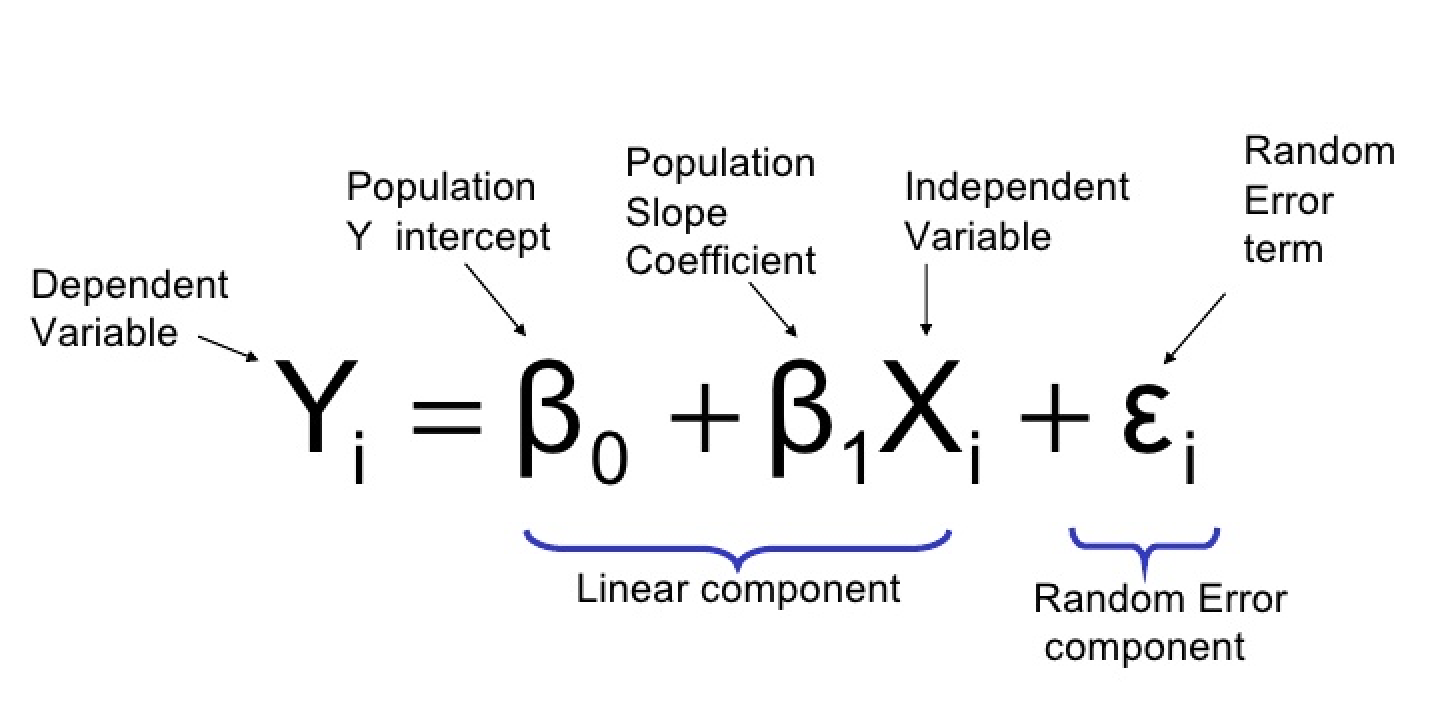

## Importing the usefull Library

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
import scipy.stats as st
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
from pandas_profiling import profile_report

### Preprocessing the data

In [2]:
df=pd.read_csv("Loan_will_approve.csv")

In [3]:
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [4]:
df.shape

(614, 13)

There is 13 columns and 614 Rows in this dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Cheaking the Null Value

In [6]:
na=df.isna().sum().reset_index().rename(columns={0:"Null"}).sort_values("Null",ascending=False)
na

index  Null
10     Credit_History    50
5       Self_Employed    32
8          LoanAmount    22
3          Dependents    15
9    Loan_Amount_Term    14
1              Gender    13
2             Married     3
0             Loan_ID     0
4           Education     0
6     ApplicantIncome     0
7   CoapplicantIncome     0
11      Property_Area     0
12        Loan_Status     0

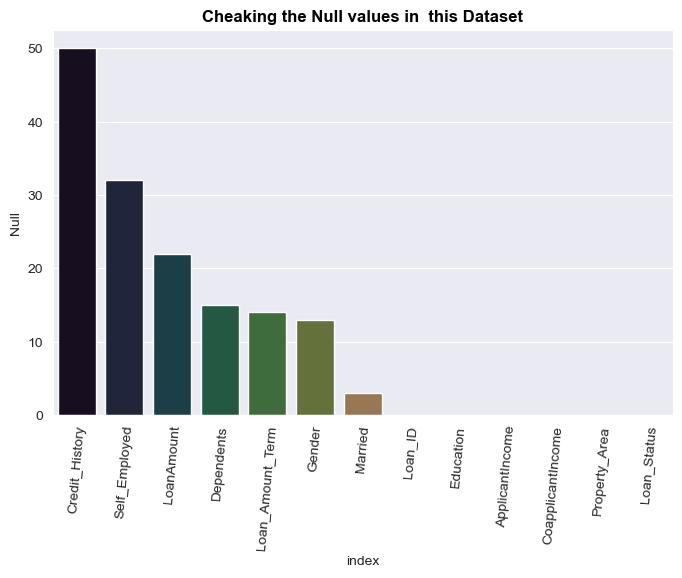

In [7]:
#sns.set(rc={'axes.facecolor':'lightblue','figure.facecolor':"white"})
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.barplot(data=na,x="index",y="Null",palette="cubehelix")
plt.xticks(rotation=85)
plt.title("Cheaking the Null values in  this Dataset",fontweight="bold",color="black")
plt.show()

* In this barplot i can easily visulize that there is seven 7 columns in Null value

# OR

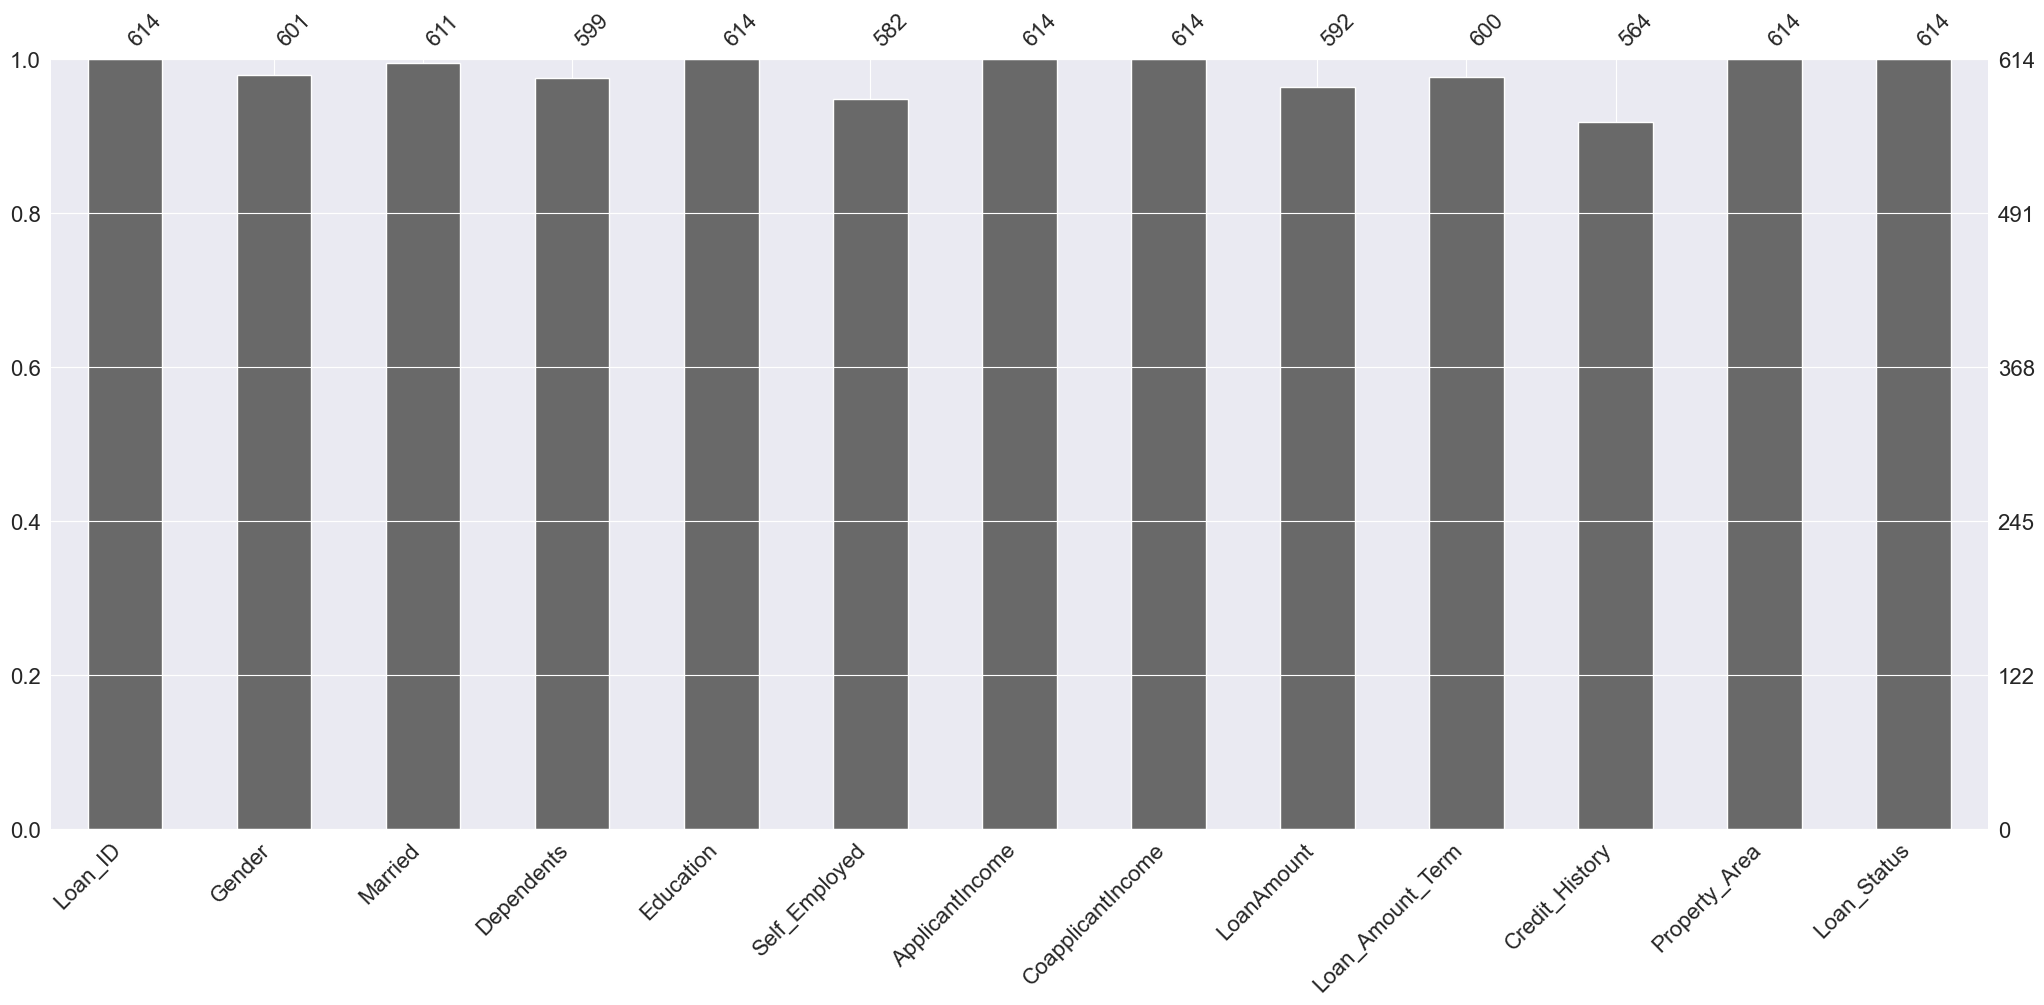

In [8]:
mns.bar(df);

With the Help of Missingo Library in easily visulize the columns of Null value

#### Remove the Null values or Fill the null values with the help of mean ,median and Mode
* We are going to drop the Loan_id Columns that's useless for the Machine Learning Model
* And Other in fillna

In [9]:
df.drop(columns="Loan_ID",inplace=True)

In [10]:
df.head(3)

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0   Male      No          0  Graduate            No             5849   
1   Male     Yes          1  Graduate            No             4583   
2   Male     Yes          0  Graduate           Yes             3000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y

In [11]:
for i in df:
    if df[i].isna().any():
        if df[i].dtypes=="float":
            if df[i].mean()-df[i].median()>10:
                df[i].fillna(df[i].median(),inplace=True)
            else:
                df[i].fillna(df[i].mean(),inplace=True)
        elif df[i].dtypes=="object":
            df[i].fillna(df[i].mode()[0],inplace=True)

In [12]:
df.head(3)

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0   Male      No          0  Graduate            No             5849   
1   Male     Yes          1  Graduate            No             4583   
2   Male     Yes          0  Graduate           Yes             3000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y

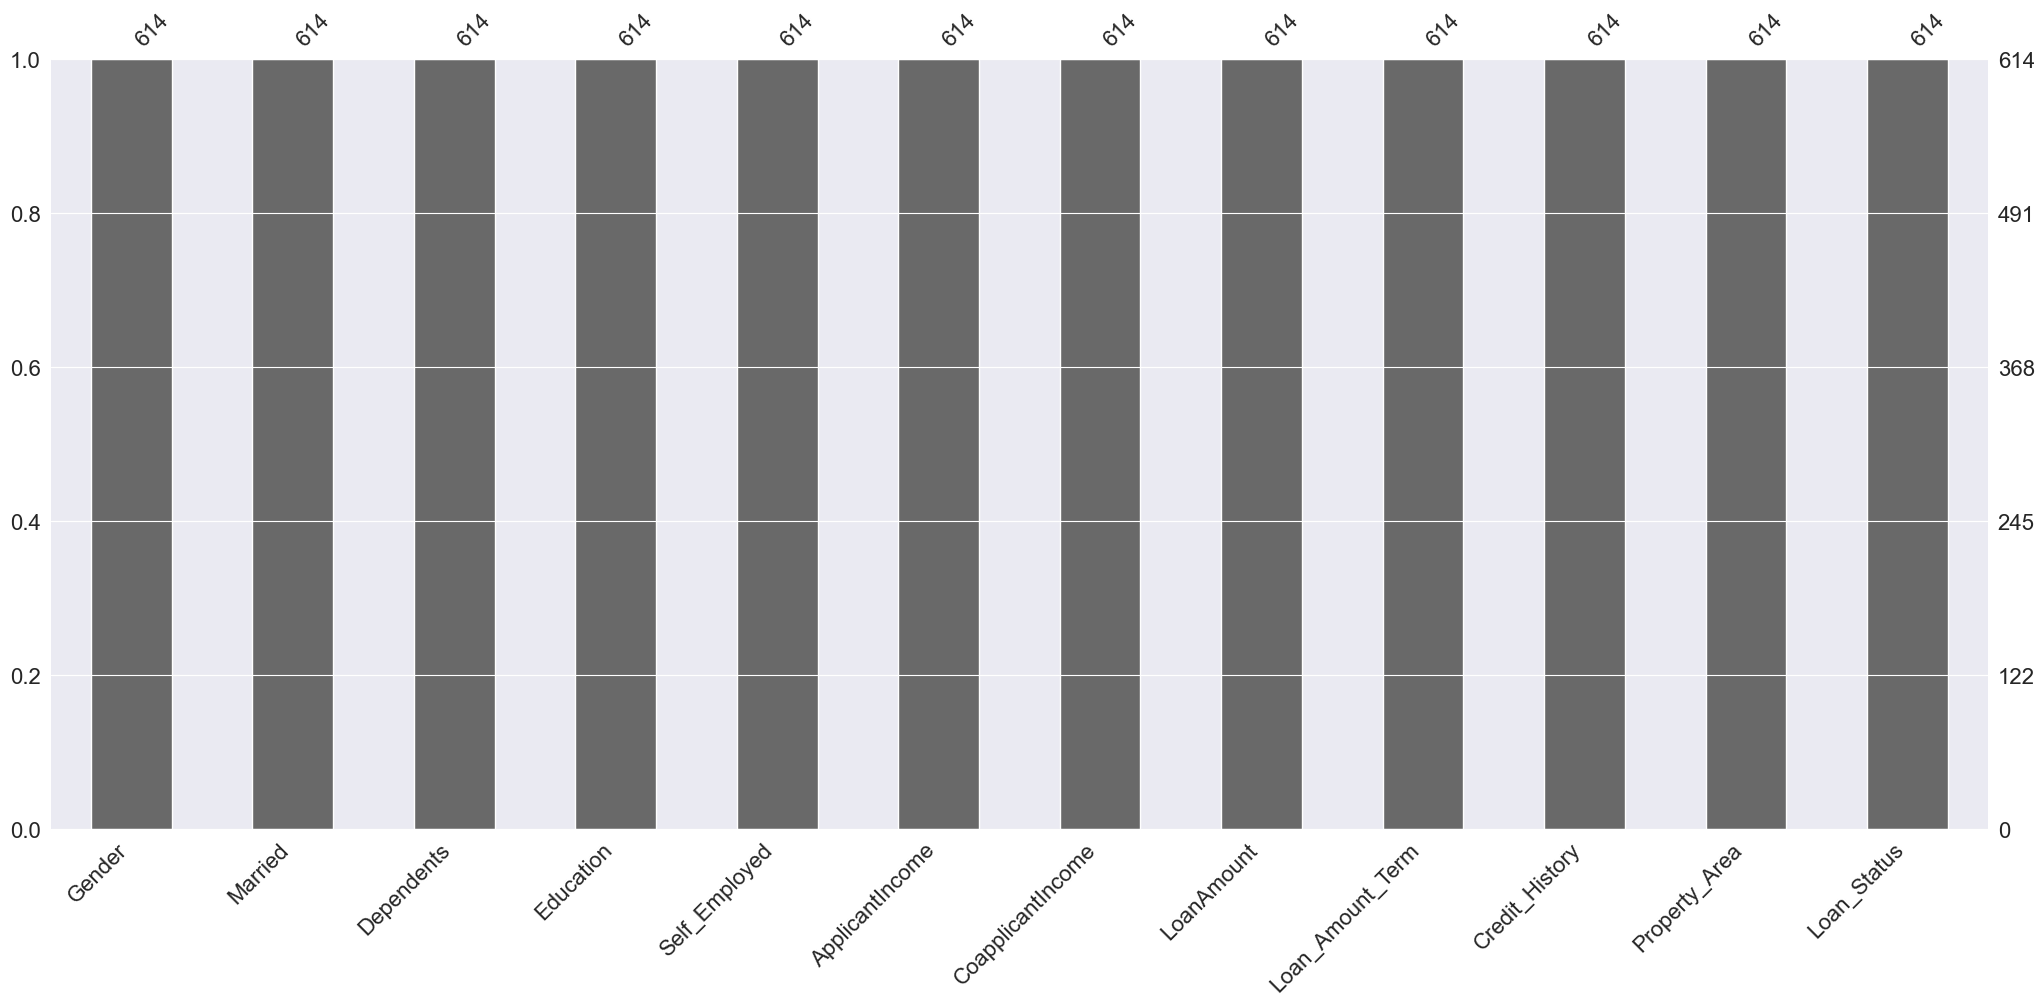

In [13]:
mns.bar(df);

In [14]:
na=df.isna().sum().reset_index().rename(columns={0:"Null"}).sort_values("Null",ascending=False)
na

index  Null
0              Gender     0
1             Married     0
2          Dependents     0
3           Education     0
4       Self_Employed     0
5     ApplicantIncome     0
6   CoapplicantIncome     0
7          LoanAmount     0
8    Loan_Amount_Term     0
9      Credit_History     0
10      Property_Area     0
11        Loan_Status     0

#### All Null Values filled with the specified Conditions mean median and Mode


In [15]:
df.tail()

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
609  Female      No          0  Graduate            No             2900   
610    Male     Yes         3+  Graduate            No             4106   
611    Male     Yes          1  Graduate            No             8072   
612    Male     Yes          2  Graduate            No             7583   
613  Female      No          0  Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N

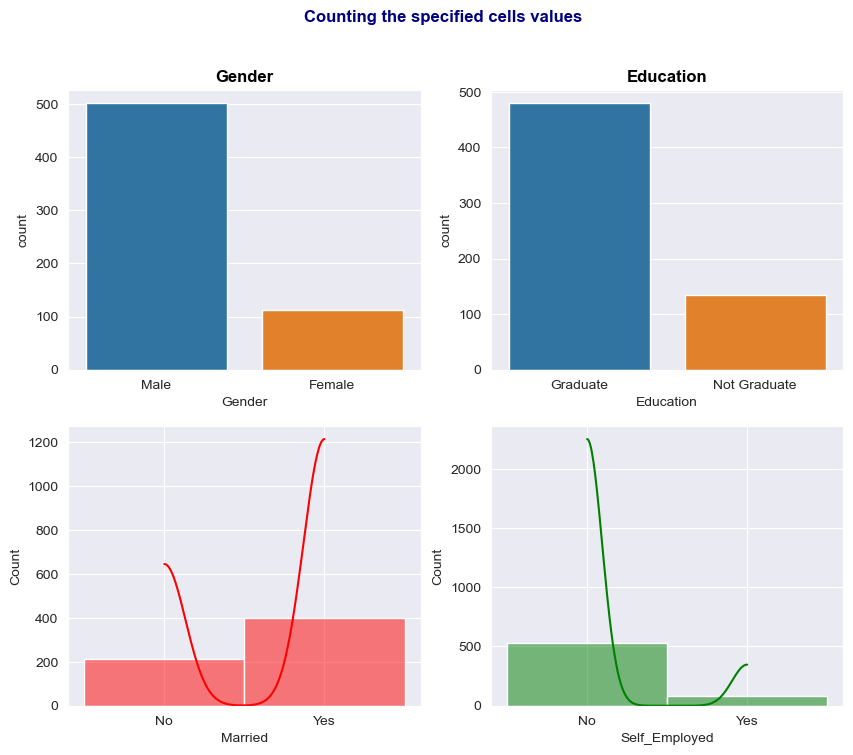

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(df["Gender"])
plt.title("Gender",fontweight="bold",color="black")
plt.subplot(2,2,2)
sns.countplot(df['Education'])
plt.title("Education",fontweight="bold",color="black")
plt.subplot(2,2,3)
sns.histplot(df["Married"],kde=True,color="red")
#plt.title("Married",fontweight="bold",color="black")
plt.subplot(2,2,4)
sns.histplot(df['Self_Employed'],kde=True,color="Green")
#plt.title("Self_Employed",fontweight="bold",color="black")
plt.suptitle("Counting the specified cells values",fontweight="bold",color="navy")
plt.show()


## Here we easily show that 

1. Number of Gender is male minimum gender is Female
2. There is the employee who is Approximate 490 Graduate and 130 Ungraduate
3. Number of married is maximum person is unmarried and minimum person is married
4. Maximum employees are not Self_Employed and minumum number employed are self Employed

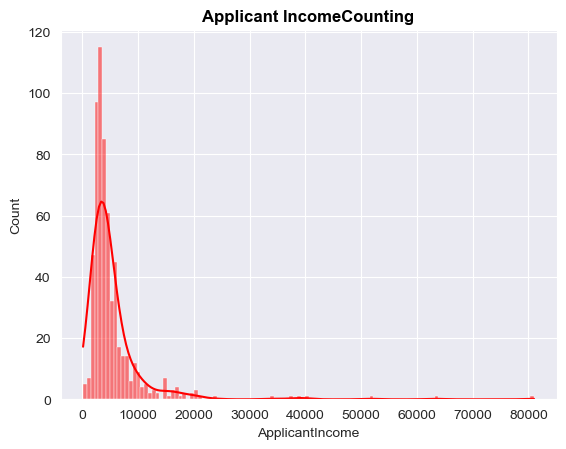

In [17]:
sns.set_style("darkgrid")
sns.histplot(df["ApplicantIncome"],kde=True,color="red")
plt.title("Applicant IncomeCounting",fontweight="bold",color="black")
plt.show()

* Maximum Number of Applicant income between 200 to 800.

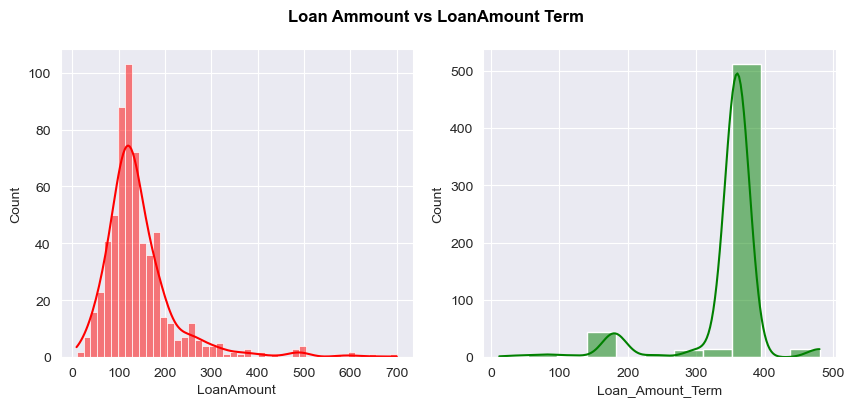

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
sns.histplot(df["Loan_Amount_Term"],kde=True,color="green")
plt.subplot(1,2,1)
sns.histplot(df["LoanAmount"],kde=True,color="red")
plt.suptitle("Loan Ammount vs LoanAmount Term",fontweight="bold",color="black")
plt.show()

In [19]:
from pandas_profiling import ProfileReport
#eda=pr(df,dark_mode=True,explorative=True)
ed=ProfileReport(df,dark_mode=True,explorative=True)
ed

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Converting the text data to numerical data with the help of LabelEncoding

In [21]:
ln=LabelEncoder()
for i in df:
    if df[i].dtypes=="object":
        df[i]=ln.fit_transform(df[i])

In [22]:
df.tail()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  Loan_Status  
609              0            1  
610              0            1  
611              2            1  
612              2            1  
613              1            0

In [23]:
df[["male","Female"]]=pd.get_dummies(df["Gender"])
df[["Married","Unmarried"]]=pd.get_dummies(df["Married"])
df[["self_emp_yes","self_emp_No"]]=pd.get_dummies(df["Self_Employed"])

In [24]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           0          0              0             5849   
1       1        0           1          0              0             4583   
2       1        0           0          0              1             3000   
3       1        0           0          1              0             2583   
4       1        1           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  male  Female  Unmarried  self_emp_yes  \
0              2            1     0       1          0             1   
1              0            0     0       1          1             1   
2              2            1     0       1          1             0   
3              2            1     0       1          1             1   
4              2            1     0       1          0             1   

   self_emp_No  
0            0  
1            0  
2            1  
3            0  
4            0

In [25]:
df.drop(columns=['Gender','Self_Employed'],inplace=True)

In [26]:
df.tail()

Married  Dependents  Education  ApplicantIncome  CoapplicantIncome  \
609        1           0          0             2900                0.0   
610        0           3          0             4106                0.0   
611        0           1          0             8072              240.0   
612        0           2          0             7583                0.0   
613        1           0          0             4583                0.0   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  \
609        71.0             360.0             1.0              0            1   
610        40.0             180.0             1.0              0            1   
611       253.0             360.0             1.0              2            1   
612       187.0             360.0             1.0              2            1   
613       133.0             360.0             0.0              1            0   

     male  Female  Unmarried  self_emp_yes  self_emp_No  
609     1       0          0             1            0  
610     0       1          1             1            0  
611     0       1          1             1            0  
612     0       1          1             1            0  
613     1       0          0             0            1

In [27]:
df.shape

(614, 15)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    uint8  
 1   Dependents         614 non-null    int32  
 2   Education          614 non-null    int32  
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    int32  
 9   Loan_Status        614 non-null    int32  
 10  male               614 non-null    uint8  
 11  Female             614 non-null    uint8  
 12  Unmarried          614 non-null    uint8  
 13  self_emp_yes       614 non-null    uint8  
 14  self_emp_No        614 non-null    uint8  
dtypes: float64(4), int32(4), int64(1), uint8(6)
memory usage: 37.3 KB


In [29]:
##Convert the unit8 data to Numerical data
ln=LabelEncoder()
for i in df:
    if df[i].dtypes=="uint8":
        df[i]=df[i].astype(int)
        

In [30]:
# Complete INformation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int32  
 1   Dependents         614 non-null    int32  
 2   Education          614 non-null    int32  
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    int32  
 9   Loan_Status        614 non-null    int32  
 10  male               614 non-null    int32  
 11  Female             614 non-null    int32  
 12  Unmarried          614 non-null    int32  
 13  self_emp_yes       614 non-null    int32  
 14  self_emp_No        614 non-null    int32  
dtypes: float64(4), int32(10), int64(1)
memory usage: 48.1 KB


In [31]:
df.tail()

Married  Dependents  Education  ApplicantIncome  CoapplicantIncome  \
609        1           0          0             2900                0.0   
610        0           3          0             4106                0.0   
611        0           1          0             8072              240.0   
612        0           2          0             7583                0.0   
613        1           0          0             4583                0.0   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  \
609        71.0             360.0             1.0              0            1   
610        40.0             180.0             1.0              0            1   
611       253.0             360.0             1.0              2            1   
612       187.0             360.0             1.0              2            1   
613       133.0             360.0             0.0              1            0   

     male  Female  Unmarried  self_emp_yes  self_emp_No  
609     1       0          0             1            0  
610     0       1          1             1            0  
611     0       1          1             1            0  
612     0       1          1             1            0  
613     1       0          0             0            1

In [32]:
# Extract the features and label or Target
x=df.drop("Loan_Status",axis=1)
x.tail()

Married  Dependents  Education  ApplicantIncome  CoapplicantIncome  \
609        1           0          0             2900                0.0   
610        0           3          0             4106                0.0   
611        0           1          0             8072              240.0   
612        0           2          0             7583                0.0   
613        1           0          0             4583                0.0   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  male  \
609        71.0             360.0             1.0              0     1   
610        40.0             180.0             1.0              0     0   
611       253.0             360.0             1.0              2     0   
612       187.0             360.0             1.0              2     0   
613       133.0             360.0             0.0              1     1   

     Female  Unmarried  self_emp_yes  self_emp_No  
609       0          0             1            0  
610       1          1             1            0  
611       1          1             1            0  
612       1          1             1            0  
613       0          0             0            1

In [33]:
y=df[['Loan_Status']]
y.head()

Loan_Status
0            1
1            0
2            1
3            1
4            1

## Standard Scalling the Features
* Standard scaling is a technique whereby the values in a column are rescaled so that they demonstrate the properties of a 
  standard Gaussian distribution, 
* where mean=0 and Varience=1

In [34]:
sc=StandardScaler()

In [35]:
x=sc.fit_transform(x)

In [36]:
x

array([[ 1.37208932, -0.73780632, -0.52836225, ..., -1.37208932,
         0.39260074, -0.39260074],
       [-0.72881553,  0.25346957, -0.52836225, ...,  0.72881553,
         0.39260074, -0.39260074],
       [-0.72881553, -0.73780632, -0.52836225, ...,  0.72881553,
        -2.54711697,  2.54711697],
       ...,
       [-0.72881553,  0.25346957, -0.52836225, ...,  0.72881553,
         0.39260074, -0.39260074],
       [-0.72881553,  1.24474546, -0.52836225, ...,  0.72881553,
         0.39260074, -0.39260074],
       [ 1.37208932, -0.73780632, -0.52836225, ..., -1.37208932,
        -2.54711697,  2.54711697]])

In [37]:
#Distribute the train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=14)
print("x"*100)
print(f"The shape of the x_train = {x_train.shape}")
print("x"*100)
print(f"The shape of the x_train = {x_test.shape}")
print("x"*100)
print(f"The shape of the x_train = {y_train.shape}")
print("x"*100)
print(f"The shape of the x_train = {y_test.shape}")
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The shape of the x_train = (429, 14)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The shape of the x_train = (185, 14)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The shape of the x_train = (429, 1)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The shape of the x_train = (185, 1)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


## Applying the Logistic Regression Model

In [38]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [39]:
pred=log.predict(x_test)
pred2=log.predict(x_train)
print("x"*100)
print(pred)
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [40]:
#ac=accuracy_score(pred,y_test)
ac=log.score(x_test,y_test)
ac_train=log.score(x_train,y_train)
print("x"*100)
print(f"Accuracy of the train model in Logistic Regression : {ac_train}")
print("x"*100)
print(f"Accuracy of the test model in Logistic Regression : {ac}")
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the train model in Logistic Regression : 0.8041958041958042
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the test model in Logistic Regression : 0.827027027027027
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [41]:
cm=confusion_matrix(y_test,pred)

In [42]:
print(cm)

[[ 31  31]
 [  1 122]]


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


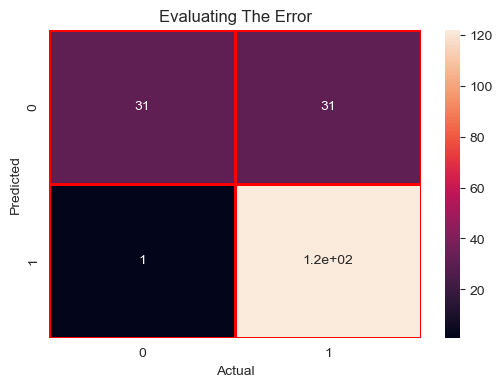

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [43]:
print("x"*100)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,linewidths=1,linecolor="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Evaluating The Error")
plt.show()
print("x"*100)

In [44]:
clr=classification_report(y_test,pred)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.50      0.66        62
           1       0.80      0.99      0.88       123

    accuracy                           0.83       185
   macro avg       0.88      0.75      0.77       185
weighted avg       0.85      0.83      0.81       185



## Hyperparameter Tunning  With GridsearchCV

In [45]:
lg=LogisticRegression()
param={"penalty":["l1","l2","elasticnet"],
       "C":[1,2,3,4,5,6,7,8,9,10,15,20,30,40],
       "max_iter":[100,200,300]}
param

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40],
 'max_iter': [100, 200, 300]}

In [46]:
grd=GridSearchCV(lg,param_grid=param,scoring="accuracy",cv=5)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [47]:
p=grd.best_params_
p

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [48]:
grd.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1])

In [49]:
grd.best_score_

0.7926128590971272

In [50]:
logs=LogisticRegression(C=1,max_iter=100,penalty='l2')
logs.fit(x_train,y_train)

LogisticRegression(C=1)

In [51]:
logs.score(x_test,y_test)

0.827027027027027

In [52]:
logs.score(x_train,y_train)

0.8041958041958042

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


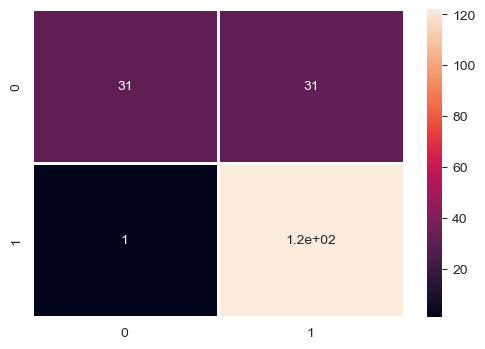

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [53]:
print("x"*100)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,logs.predict(x_test)),annot=True,linecolor="white",linewidths=1)
plt.show()
print("x"*100)

## EDA (Exploratory Data Analysis)

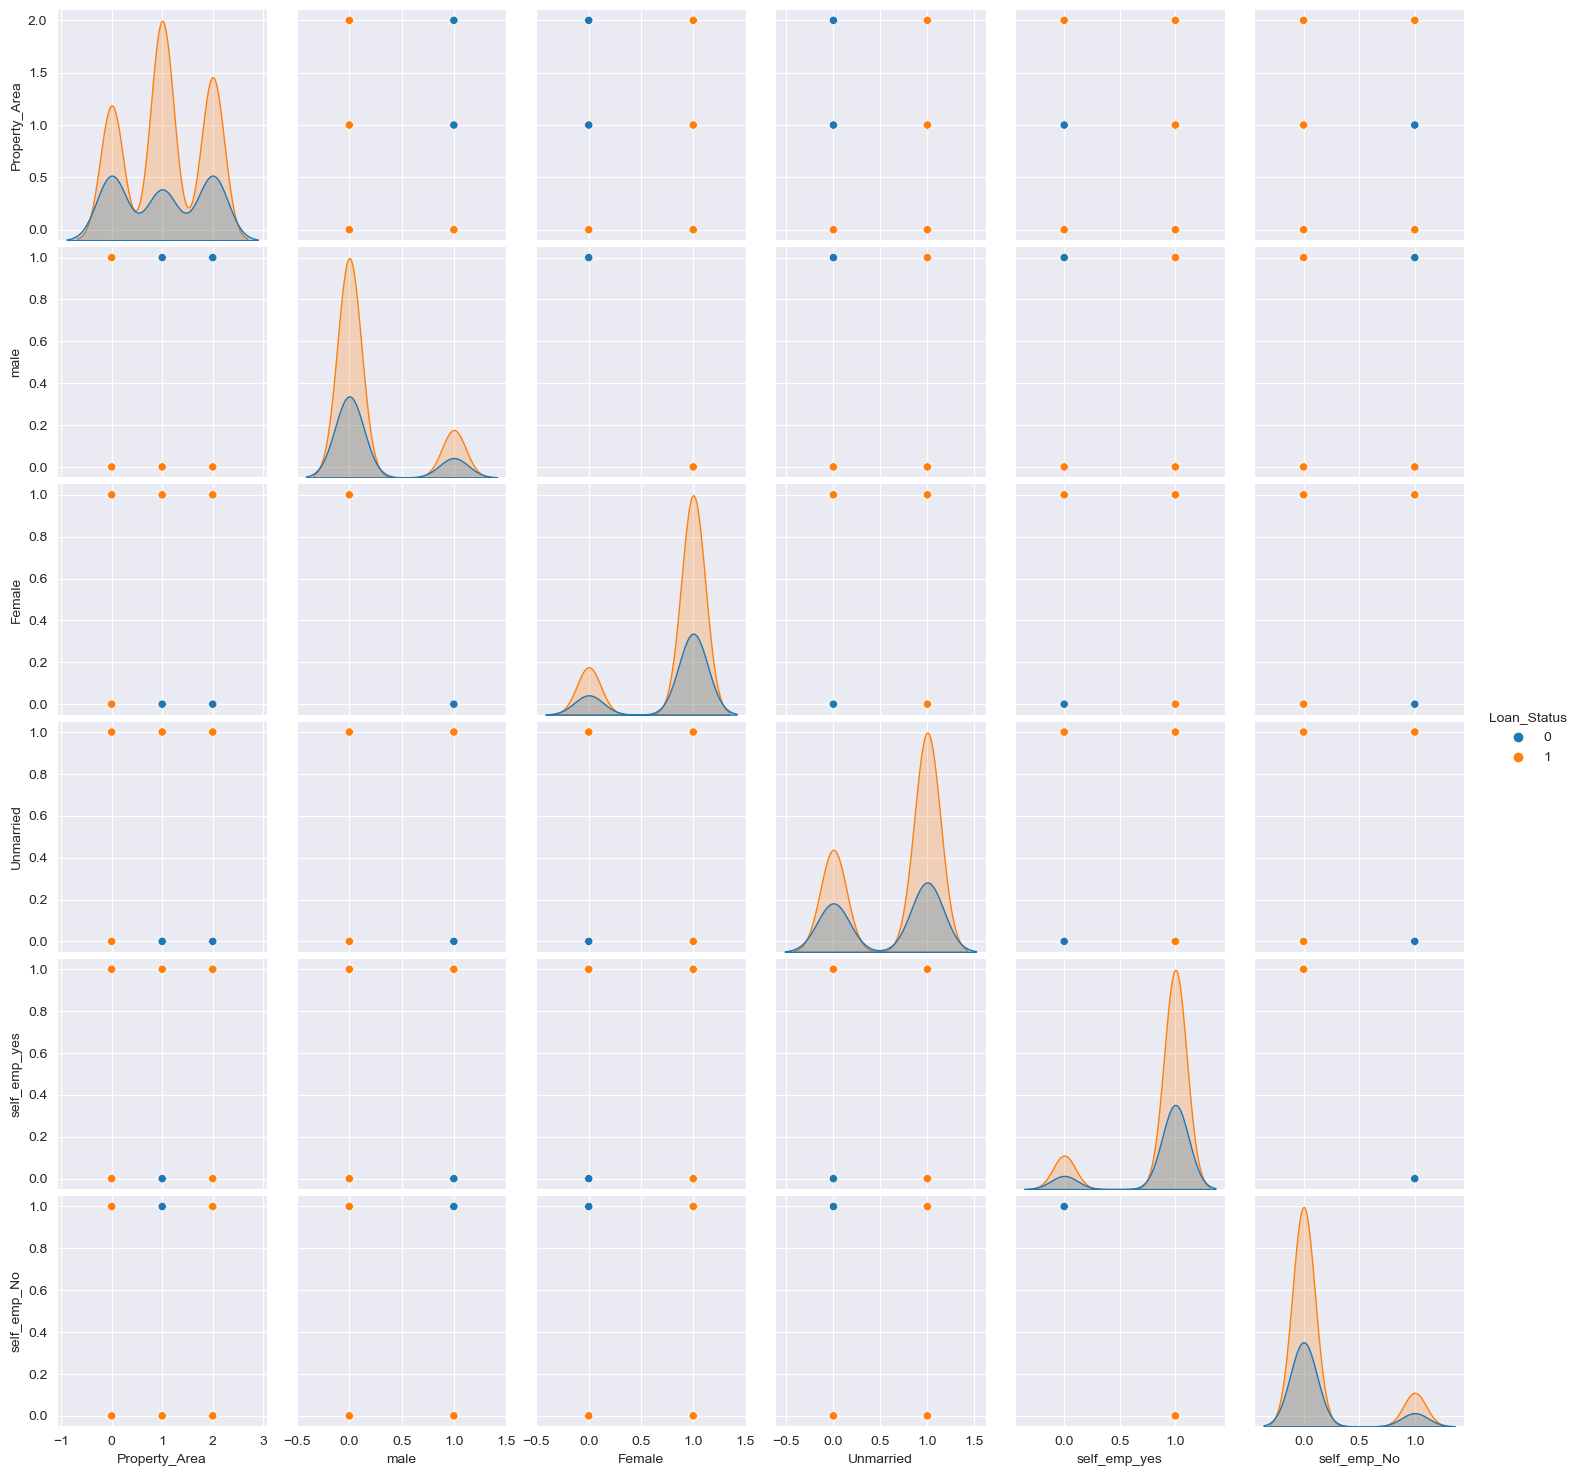

In [54]:
sns.pairplot(df.iloc[0:,8:],hue="Loan_Status");

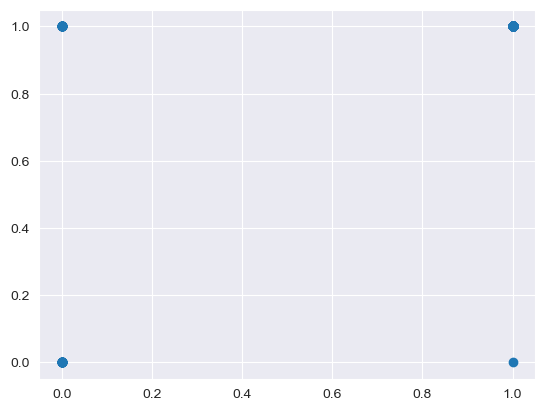

In [55]:

plt.scatter(y_test,pred)

Logistic regression is also known as Binomial logistics regression. It is based on sigmoid function where output is probability and input can be from -infinity to +infinity. Let’s discuss some advantages and disadvantages of Linear Regression.

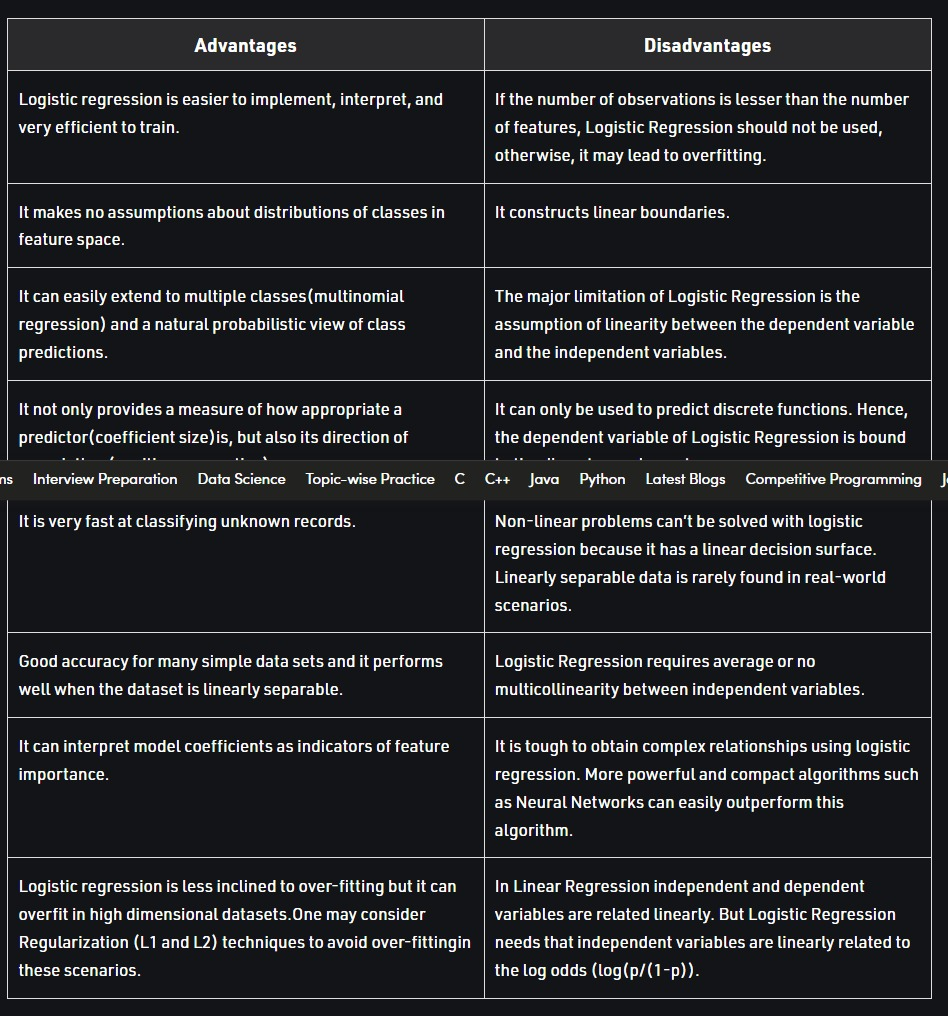

## I have completed my Logistic regression task